## Class 2: Visualizing data and more!

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Uploading data to temporary storage on Google Colab!!
Before we begin you must upload the data file(s) you want to use to Google Colab.

### Let's upload the file "hubble1929.csv" to Google Colab storage!

### You must do this EVERY time you start a session because Colab removes the file once you end the session.

### Please also save the data files somewhere permanent where you can easily access.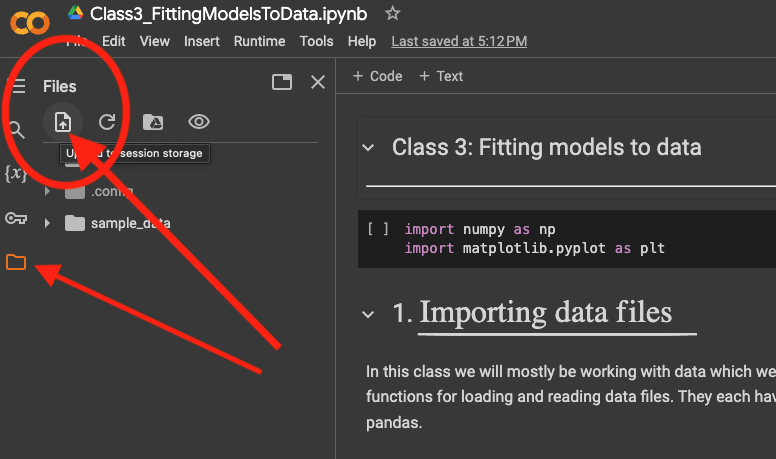

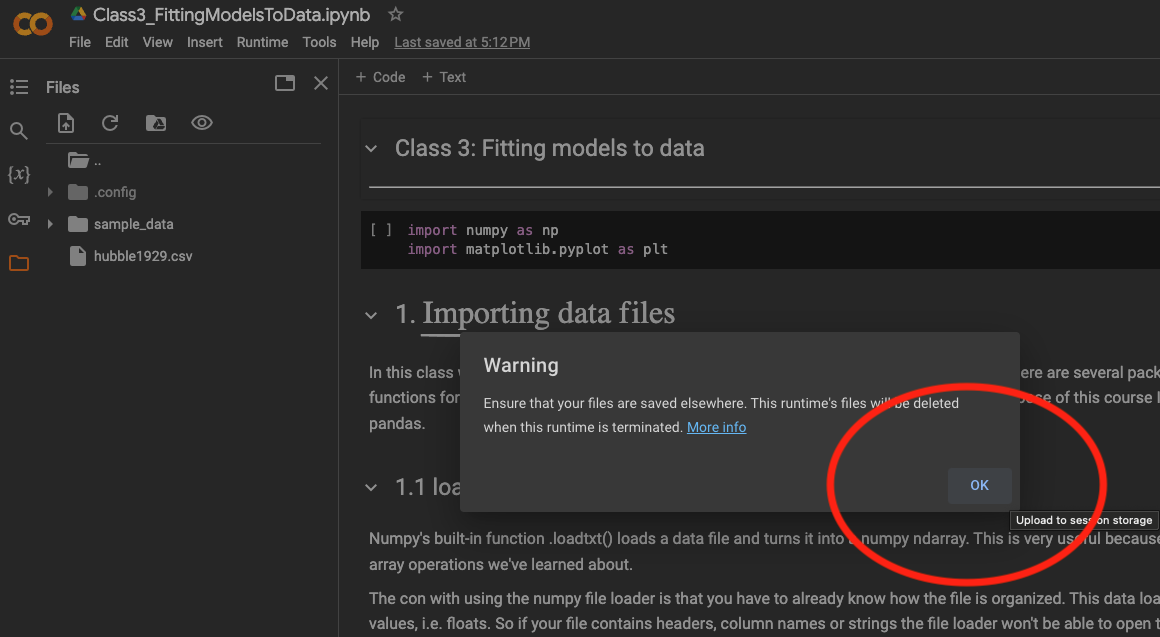

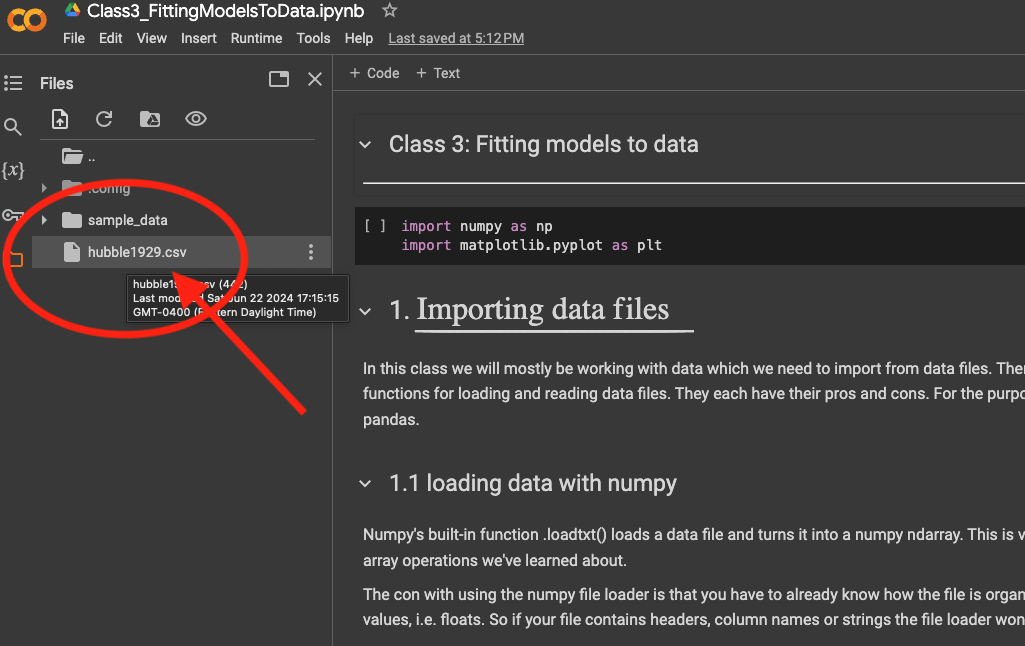

# 1. $\underline{{\rm Importing\ data\ files}}$
In this class we will mostly be working with data which we need to import from data files.
There are several packages that have built-in functions for loading and reading data files. They each have their pros and cons. For the purpose of this course I suggest using either numpy or pandas.

## 1.1 loading data with numpy
Numpy's built-in function .loadtxt() loads a data file and turns it into a numpy ndarray. This is very useful because then we can perform all the array operations we've learned about.

The con with using the numpy file loader is that you have to already know how the file is organized. This data loader can only read numerical values, i.e. floats. So if your file contains headers, column names or strings the file loader won't be able to open the file.

We are going to load a data file containing Edwin Hubble's famous 1929 data. The file is named 'hubble1929.csv'. This data file has a header of column names and contains 3 columns:
- Name of the galaxy, first column
- Disatnce to the galaxy in units of Mpc (Mega-parsecs), second column
- Recessional velocity (often called radial velocity) of the galaxy in units of km/s, third column

Therfore, to load this file with numpy, we will have to skip the first row, and we know we want the indeces for the second and third columns.

In [ ]:
### LET'S DESCRIBE THE SYNTAX AND OUTPUT TOGETHER
# create an array that loads and stores the data
# skiprows is how many rows to skip (header)
# usecols are the indeces of the columns (0,1,2,3.....)
# delimiter is what separates the values
Hubble_array = np.loadtxt('hubble1929.csv', skiprows=1, usecols=[1,2], delimiter=',')

Hubble_array.shape ### WHAT DOES THIS LINE DO?

(24, 2)

In [ ]:
# show the first 5 rows
Hubble_array[0:5]

array([[ 3.20e-02,  1.70e+02],
       [ 3.40e-02,  2.90e+02],
       [ 2.14e-01, -1.30e+02],
       [ 2.63e-01, -7.00e+01],
       [ 2.75e-01, -1.85e+02]])

Now we can perform all the numpy array operations

In [ ]:
### let's make two variables to store the distances and velocities seperately
Hub_dist = Hubble_array[:,0]
Hub_vel  = Hubble_array[:,1]

### print some output
print('data type of these variables:', type(Hub_dist))
print('Hubble distances', Hub_dist[0:5])
print('Hubble velocities', Hub_vel[0:5])

data type of these variables: <class 'numpy.ndarray'>
Hubble distances [0.032 0.034 0.214 0.263 0.275]
Hubble velocities [ 170.  290. -130.  -70. -185.]


## 1.2 loading data with pandas
Pandas is a python package that is useful for working with dataframes. Once it loads the file, it turns it into a datafram object wich contains all the column names and row names (if they exist in the file). Therfore, extracting these data from pandas and turning them into arrays is a little different.

More informationon pandas can be found here: https://pandas.pydata.org/docs/user_guide/10min.html

Let's start by importing the pandas package and giving it the shortcut pd

In [ ]:
import pandas as pd

Let's import the hubble1929.csv file with pandas, This will create a data frame.

In [ ]:
### LET'S DESCRIBE THE SYNTAX AND OUTPUT TOGETHER

# create a data frame that loads and stores the data
Hubble_df = pd.read_csv('hubble1929.csv')

print(Hubble_df.shape)

# print the first 5 rows NOTICE THE DIFFERENCE
Hubble_df.head()

(24, 3)

In [ ]:
# another option if I just want the names of the columns of a pandas dataframe
Hubble_df.columns

Index(['galaxy', 'distance', 'velocity'], dtype='object')

In [ ]:
### let's make two variables to store the distances and velocities seperately
### LET'S DESCRIBE THE SYNTAX AND OUTPUT TOGETHER

Hub_dist_pd = Hubble_df['distance']
Hub_vel_pd  = Hubble_df['velocity']

### print some output
print('data type of these variables:', type(Hub_dist_pd))
print('Hubble distances', Hub_dist_pd[0:5])
print('Hubble velocities', Hub_vel_pd[0:5])

data type of these variables: <class 'pandas.core.series.Series'>
Hubble distances 0    0.032
1    0.034
2    0.214
3    0.263
4    0.275
Name: distance, dtype: float64
Hubble velocities 0    170
1    290
2   -130
3    -70
4   -185
Name: velocity, dtype: int64


We can perform many operations with these pandas variables, for example

In [ ]:
Hub_dist_pd[0:5]*2

,distance
0,0.064
1,0.068
2,0.428
3,0.526
4,0.550


In [ ]:
Hub_dist_pd[0:5]+Hub_vel_pd[0:5]

,0
0,170.032
1,290.034
2,-129.786
3,-69.737
4,-184.725


But we can't do everything we can do with numpy arrays. For example:

In [ ]:
# With numpy arrays we can
print('With numpy:', Hub_dist[0:5]+Hub_vel[10:15])

# but we can't do the same with pandas
print('With pandas:', Hub_dist_pd[0:5]+Hub_vel_pd[10:15])

With numpy: [300.032 -29.966 650.214 150.263 500.275]
With pandas: 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
dtype: float64


Pandas has a .to_numpy() function that converts our pandas variables to numpy variables.
https://pandas.pydata.org/docs/reference/api/pandas.Series.to_numpy.html

In [ ]:
### LET'S DESCRIBE THE SYNTAX AND OUTPUT TOGETHER
Hub_dist_new = Hub_dist_pd.to_numpy()
Hub_vel_new  = Hub_vel_pd.to_numpy()

# and now we can
Hub_dist_new[0:5]+Hub_vel_new[10:15]

array([300.032, -29.966, 650.214, 150.263, 500.275])

# $\underline{{\rm Exercise\ A.}}$
Create a scatter plot of the Hubble data with the distances on the x-axis and radial velocities on the y-axis.
- label your axis wwith appropriate units
- include a title

Text(0, 0.5, 'Radial velocity [km/s]')

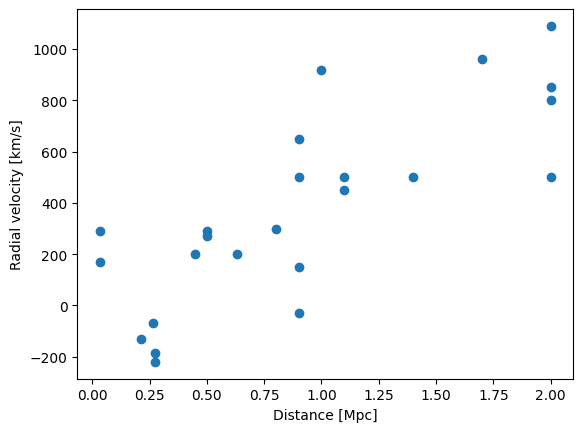

In [ ]:
plt.scatter(Hub_dist, Hub_vel)
plt.xlabel('Distance [Mpc]')
plt.ylabel('Radial velocity [km/s]')

What trend do we notice?

# 2. $\underline{{\rm Visualizing\ with\ toy\ data}}$

## 2.1 Numpy random generators
Numpy has usful module "random." with many built-in functions that create "random" samples. Here I put "random" in quotes because python really creates *pseudorandom* numbers. Meaning the random numbers generated by python are not truly random in the mathematical/scientific definition, but are seemingly random, allowing us to perform experiments with random numbers which are reproducible, if needed.

Some numpy random number generators include:

*   np.random.randn( ), returns random floats with a standard normal distribution
*   np.random.rand( ), returns random floats with a uniform distribution between [0, 1)
*   np.random.randint( ), returns random integers with a discrete uniform distribution between keywords [low, high)

more information on random number generators can be found here:
https://numpy.org/doc/stable/reference/random/generator.html

In [ ]:
#np.rmandom.randn() and np.random.rand() take dimensions as inputs, (# in dimension1, # in dimension 2, etc)

#so let's say we want one random number that would fit in a typical normal distribution
#note: a normal distribution has a mean of zero and standard deviation of 1

#We can call the np.random.randn(), and pass the number 1 in the first dimension
np.random.rand(1)

array([0.18299078])

Run the above cell several times, what do you notice?

In [ ]:
# Let's print a 1-dimensional array of 5 random numbers that fit a normal distribution
print('a random 1x5 array:')
print(np.random.randn(5))

# Let's print a 2-dimensional array of 4 rows and 2 columns (a 4x2 array)
print('a random 4x2 array:')
print(np.random.randn(4,2))

#Let's print a 3-dimensional array of 3 sets of 2x2 arrays
print('a random 3x2x2 array:')
print(np.random.randn(3,2,2))

a random 1x5 array:
[-1.79607268  0.49109696 -0.85804414  0.00805866  0.3729561 ]
a random 4x2 array:
[[-1.31393105 -0.88347014]
 [ 1.57178249 -0.13497689]
 [ 0.19059178 -0.69342135]
 [-0.0678127  -0.89426641]]
a random 3x2x2 array:
[[[ 2.26717038 -1.62075106]
  [-0.52289336 -0.69982286]]

 [[-0.35471037  0.01968227]
  [ 0.79806268 -0.1982899 ]]

 [[-1.54140286 -1.6910684 ]
  [ 0.81307727  0.40284945]]]


### Why is this useful?
Because these are numpy arrays, we can perform all the mathematical operations on them. This makes them useful for many things, but for our purposes we use these to make "toy" data.


In [ ]:
# the np.random.seed() function allows us to reproduce the output from a random generator

### Run this cell several times!
np.random.seed(0)
np.random.randn(1)

array([1.76405235])

## 2.2 Histograms

Histograms are useful visualizations of the distribution of data. They show us the frequency of numerical data.

We use the built-in matplotlib.pyplot function plt.hist( ) to visualize distributions of our data.

Histograms are useful when we have a large sample of data.

Let's make a sample of 1000 data points with a normal distribution and make the histogram.

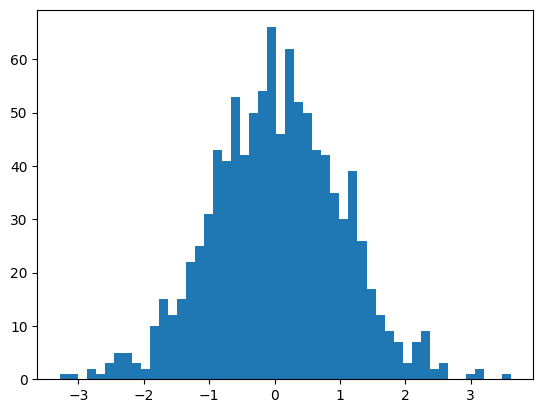

In [ ]:
#start with a random seed so the values of our random distribution will remain the same
np.random.seed(5)

#make an array holding 1000 random points
test_sample = np.random.randn(1000)


#make the histogram
### LET"S DESCRIBE THE SYNTAX AND OUTPUT TOGETHER
plt.hist(test_sample, bins=50);

### WHAT HAPPENS WHEN WE CHANGE THE bins= VALUE?
### WHAT HAPPENS WHEN WE INCREASE OR DECREASE OUR SAMPLE SIZE?

In the above output, we see the "bell shape" of the normal distribution.

### Discuss:

*   Which value (approximately) has the greatest frequncy? What is that frequency?
*   Which values (approximately) have the lowest frequency? What is that frequancy?
*   Between which values would we expect to find most of the data? How could we confirm this using what we learned about numpy statistical functions yesterday?





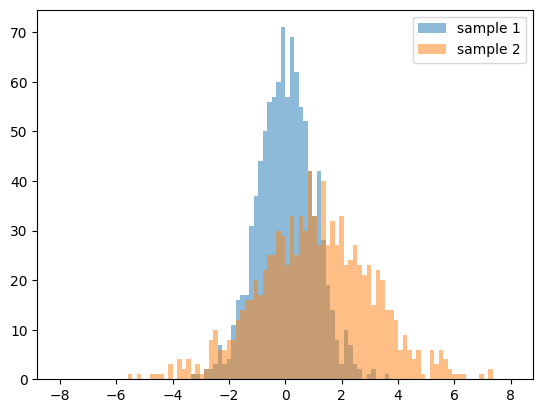

In [ ]:
# let's make a second sample distribution. This one is a normal distribution with standard deviation of 2 and mean of 1
bins=np.linspace(-8,8,101)
### How did we make this distribution?
test_sample_2 = 2*test_sample+1

#plot the histograms and compare
### LET"S DESCRIBE THE SYNTAX AND OUTPUT TOGETHER
plt.hist(test_sample, bins=bins, alpha=0.5, label='sample 1')
plt.hist(test_sample_2, bins=bins, alpha=0.5, label ='sample 2')
plt.legend();

# $\underline{\mathrm{Exercise\ B.}}$

1. Create a data sample of at least 1000 data points that has a normal distribution with mean 2 and standard deviation of 3.
2. Create a data sample of at least 1000 data points that has a uniform distribution from -2 to 10. What approximate shape does a uniform distribution make?
3. Plot the histograms of these data samples with keyword histtype='step'. Create a legend with the types of distributions as the labels. Give your figure a title.
4. In a seperate cell, replot the same histograms, but this time as the probability density function. (hint: use the help() function to see which keyword does this for you.)
5. What does the probability density function tell us? What would be the advantage of comparing probability density instead of frequency?


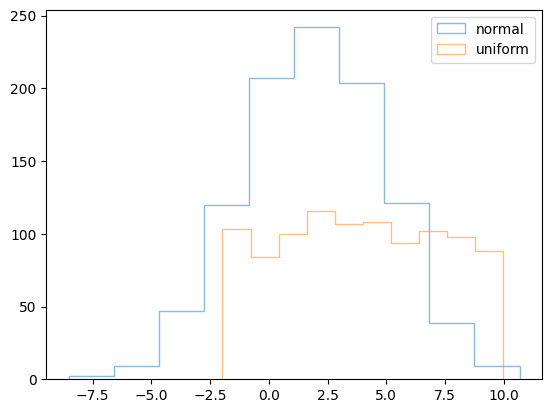

In [ ]:
a = np.random.randn(1000)*3+2
b = np.random.rand(1000)*12-2
plt.hist(a, alpha=0.5, histtype='step', label='normal')
plt.hist(b, alpha=0.5, histtype='step', label='uniform')
plt.legend();

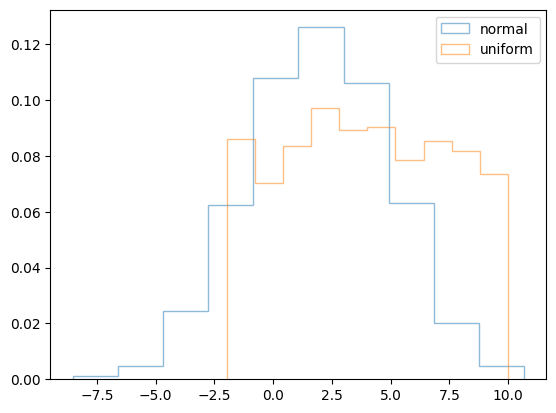

In [ ]:
plt.hist(a, alpha=0.5, histtype='step', density=True, label='normal')
plt.hist(b, alpha=0.5, histtype='step', density=True, label='uniform')
plt.legend();

## 2.3 Error bars

Let's start by making a "toy" example of a light curve. In a "toy" example, we start with the general knowledge of the physical behavior of a phenomenon and add in some statistical or systemic "noise".

Our toy example will sart with the knowledge that measurments of flux from an orbiting body behaves as a sine wave. We can then use numpy random generators to add random noise.


In [ ]:
# let's begin with a toy example of a lightcurve, which can be represented by a sine wave

t = np.linspace(0, 10, 50) # this array holds 50 units of time
y = np.sin(t) + np.random.rand(50) # this array makes a sine curve with added random noise
dy = 0.8 #this is the uncertainty, or the error, on our toy measurement

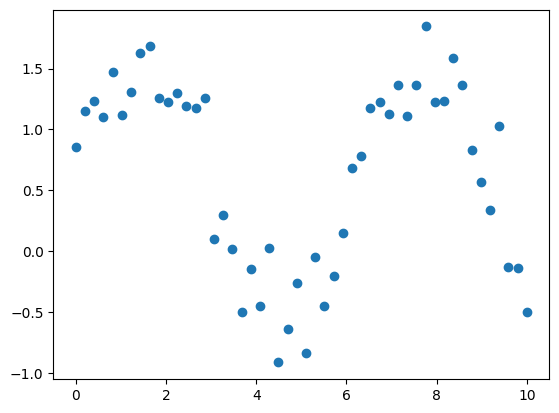

In [ ]:
# let's plot the data points
plt.scatter(t, y)

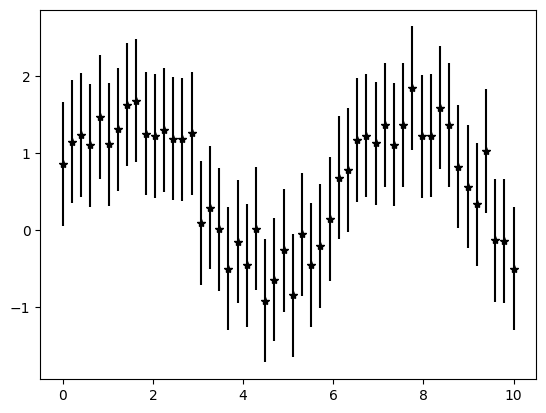

In [ ]:
# and we can use plt.errorbar to make the error bars of the uncertainty
plt.errorbar(t, y, yerr=dy, fmt='*k');

Based on these error bars, would you say we have a good measuremnet on the observable? Explain.

## 2.4 Color coding

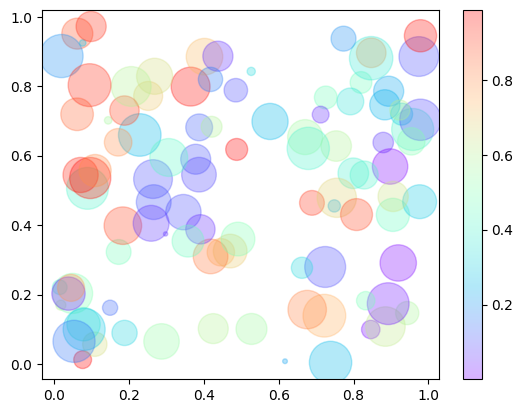

In [ ]:
### WHAT IS THIS CODE DOING?

# let's comment each line together

x_dots = np.random.uniform(size=100) #create a new array with 100 random values
y_dots = np.random.uniform(size=100) #same
colors = np.random.uniform(size=100) #same
sizes = 1000 * np.random.uniform(size=100)

plt.scatter(x_dots, y_dots, c=colors, s=sizes, alpha=.3,
            cmap='rainbow')
plt.colorbar();  # show color scale

Color codilng (or size coding) are useful when you want to visualize the dependence of the relation in a plot on a third parameter not shown in either of the axis.

# 3. $\underline{{\rm Working\ with\ units}}$

In astronomy and physics, units are crucial. We need to be comfortable working with units because data are reported/measured in a range of scales. Furthermore, many physical units decompose into other units. For example energy, which in astronomy is often reported in [erg], decomposes into a [dyn cm] and even urther, a [dyn] decomposes into a [g cm/s^2].

Enter the astropy package.

The astropy package has built-in attributes and functions that provide us with constants in nature and allows us to add units, convert units, and remove units in our code.

The two quantity objects from astropy we work with are constants and units. Let's import them.

In [ ]:
from astropy import constants, units

In [ ]:
### Some constants in nature

# print mass of our sun
constants.M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>

In [ ]:
# the speed of light
constants.c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [ ]:
### We can also include units in our own input

#make a variable that stores the quantity 10 egs

test_e = 10*units.erg
test_e

<Quantity 10. erg>

In [ ]:
#another unit of energy is a Joule, let's see how to convert our test_e variable into joules

### LET'S DESCRIBE THE SYNTAX TOGETHER
test_e.to(units.J)

<Quantity 1.e-06 J>

In [ ]:
### we can also get just the value, without the units, of something that already has units

#get the units
Sun_Mass = constants.M_sun
print('the solar mass in kg:', Sun_Mass)

#convert to grams
Sun_Mass = Sun_Mass.to(units.g)
print('the solar mass in g:', Sun_Mass)


#convert to Earth masses!
Sun_Mass = Sun_Mass.to(units.M_earth)
print('the solar mass in Earth masses:', Sun_Mass)

#keep the Sun Mass in Earth mass units, but remove the units
Sun_Mass = Sun_Mass.value
print('the solar mass in Earth masses without the units:', Sun_Mass)

the solar mass in kg:   Name   = Solar mass
  Value  = 1.988409870698051e+30
  Uncertainty  = 4.468805426856864e+25
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018
the solar mass in g: 1.988409870698051e+33 g
the solar mass in Earth masses: 332946.07832806994 earthMass
the solar mass in Earth masses without the units: 332946.07832806994


Let's use Netwon's second law to calculate the net Force a 45 kg mass exerts on an object accelerating at 3m/s^2.

The formula is F = ma (Force = mass x acceleration)

# $\underline{{\rm Exercise\ C.}}$
Use Netwon's second law to calculate the net Force a 45 kg mass exerts on an object accelerating at 3m/s^2.

Make your output in units of Newtons

The formula is F = ma (Force = mass x acceleration)

You can do this without writing a function.

In [ ]:
m = 45*units.kg
a = 3*units.m/units.s**2
F = m*a
F.to(units.N)


<Quantity 135. N>

### Some very important units in astronomy are thos of solar units!

We often measure things in solar units. So a solar mass will be how many times massiv as the sun, solar radii are how many times the radius of the sun, etc. Their symbol is always $⊙$

In [ ]:
### Notice the difference!

#This is the symbol for solar Radius:
units.R_sun

Unit("solRad")

In [ ]:
#This is the quantity of solar Radius
constants.R_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar radius' value=695700000.0 uncertainty=0.0 unit='m' reference='IAU 2015 Resolution B 3'>

In order to fill numpy arrays, the values must be unitless, so we must be sure to use the .value attribute if we are filling an array with elements that have units.

In [ ]:
### WHAT IS THIS CODE DOING?

sample = np.zeros(5, dtype=float)

velocity = 35*units.m/units.s

for i in range(5):
  sample[i] = (i*velocity).value

sample

array([  0.,  35.,  70., 105., 140.])

# $\underline{{\rm Exercise\ D.}}$



In this exercise you will make a figure showing the dependence of stellar luminosity on stellar temperature and radius!

The equation for bolometric luminosity we will use is:
$$ L_{\rm bol} = 4\pi\ r^2 \sigma T^4$$

where we will return $L_{\rm bol}$ in units of [$L_{\odot}$],\
$r$ is the radius of the star in units of [$R_{\odot}$],\
$\sigma$ is the Stefan-Boltzman constant which equals $5.67\times10^{-5} [{\rm erg s^{-1} cm^{-2} K^{-4}}]$ but astropy constants has this quantity for you\
$T$ is stellar temperature in [K].


1. Write a function for the luminosity that takes radius and temperature as arguments.\
  - you will want all of your units to be handled and converted inside the function.

2. Create an array of 10 temperatures equally spaced in *descending* order from  6000 to 3000

3. Create an array of 10 radii in *logspace* between 1.0 and 1000 Hint: in logspace, 0 = 1 and 1000 = 3. see np.logspace()
https://numpy.org/doc/stable/reference/generated/numpy.logspace.html

4. Pass your temperature and radius array to your function to obtain the values for luminosity

5. Create a scatter plot of tempertaure on the x-axis and luminosity on the y-axis. You will need to use a script written like:\
    fig, ax = plt.subplots()\
    ax.scatter(x,y)\
    ...\
  - Invert your x-axis so it is *decreasing* from 6000-->3000. I know this is backward but this is how we map stellar evolution! (ax.invert_xaxis()) Don't forget to label your axes with units!
  - set the y-axis to log scale (ax.set_yscale('log'))
  - color code by radius, don't forget the color bar!
  - set the marker size to radius also.

6. If you have time, add a single scatter point (you choose the marker style and color) where our sun currently is! At 1 solar radius with temperature ~ 5578 K. Check: This should be right around L~1 (remember in log this is $10^0$)


In [ ]:
def L_bol(r,T):
  '''
  This function calculates the luminosity of a star.

  parameters:
  -----------
  r: (int, float, or array, radius if the star in solar radii)
  T: (int, float or array, temperature of the star in Kelvin)

  returns:
  --------
  stellar luminosity: (float, in solar luminosities)
  '''

  return (4*np.pi*(r*units.R_sun)**2*sigma*(T*units.K)**4).to(units.L_sun)

In [ ]:
np.linspace(6000, 3000)

array([6000.        , 5938.7755102 , 5877.55102041, 5816.32653061,
       5755.10204082, 5693.87755102, 5632.65306122, 5571.42857143,
       5510.20408163, 5448.97959184, 5387.75510204, 5326.53061224,
       5265.30612245, 5204.08163265, 5142.85714286, 5081.63265306,
       5020.40816327, 4959.18367347, 4897.95918367, 4836.73469388,
       4775.51020408, 4714.28571429, 4653.06122449, 4591.83673469,
       4530.6122449 , 4469.3877551 , 4408.16326531, 4346.93877551,
       4285.71428571, 4224.48979592, 4163.26530612, 4102.04081633,
       4040.81632653, 3979.59183673, 3918.36734694, 3857.14285714,
       3795.91836735, 3734.69387755, 3673.46938776, 3612.24489796,
       3551.02040816, 3489.79591837, 3428.57142857, 3367.34693878,
       3306.12244898, 3244.89795918, 3183.67346939, 3122.44897959,
       3061.2244898 , 3000.        ])

In [ ]:
temp = np.linspace(3000, 6000, num=10)[::-1]
rad = np.logspace(0,3, num=10)
temp

array([6000.        , 5666.66666667, 5333.33333333, 5000.        ,
       4666.66666667, 4333.33333333, 4000.        , 3666.66666667,
       3333.33333333, 3000.        ])

In [ ]:
rad

array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])

In [ ]:
sigma = constants.sigma_sb
L_sun = 4*np.pi*(constants.R_sun)**2*sigma*(5778*units.K)**4
L_sun.to(units.L_sun)

<Quantity 1.00416211 solLum>

In [ ]:
L = L_bol(rad, temp)

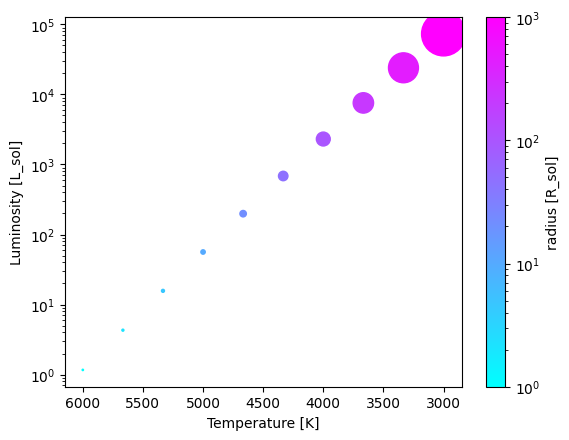

In [ ]:
fig, ax = plt.subplots()
plt.scatter(temp, L, s=rad, c=rad, cmap='cool', norm='log')
ax.set_yscale('log')
ax.invert_xaxis()
plt.xlabel('Temperature [K]')
plt.ylabel('Luminosity [L_sol]')
plt.colorbar(label='radius [R_sol]');

# Restart and rerun your notebook